# start with importing all the data and packages needed

In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt

In [2]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [3]:
us = pd.read_csv('ofac_sdn.csv',low_memory=False)
bis = pd.read_csv('us_bis.csv',low_memory=False)
cons = pd.read_csv('ofac_cons.csv',low_memory=False)

# import trigger data

In [23]:
#load trigger data
conflict = pd.read_csv('IV\\ucdp_cleaned.csv')
conflict_os = pd.read_csv('IV\\ucdp_os.csv')
coup= pd.read_csv('IV\\coup_data.csv')
terror= pd.read_csv('IV\\data_gti.csv')
protest= pd.read_csv('IV\\acled_clean.csv')

# us SDN list

**descriptives**

In [4]:
data = us.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'last_seen', 'first_seen', 'date_stamp',
       'last_change', 'new_entry', 'deletion', 'unchanged', 'month',
       'listing_count', 'listing_date', 'delisting_date', 'new_listing_count',
       'iso', 'country_0', 'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1    Unnamed: 0    date_stamp  listing_count  listing_date  \
count  41204.000000  41204.000000  4.120400e+04   41204.000000  4.120400e+04   
mean   20601.500000  14570.199956  2.021572e+07   12879.596034  2.021572e+07   
std    11894.714583   8220.362660  6.811643e+03    3961.327226  6.811643e+03   
min        0.000000      0.000000  2.021082e+07    9053.000000  2.021082e+07   
25%    10300.750000   7749.750000  2.021082e+07    9124.000000  2.021082e+07   
50%    20601.500000  14478.500000  2.021093e+07   10966.000000  2.021093e

In [5]:
data = data.reset_index()
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis= 'columns')
data

,index,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,...,unchanged,month,listing_count,listing_date,delisting_date,new_listing_count,iso,country_0,year_id,month_id
0,0,NK-226JTDehVMSXex35EbKPmi,Organization,BENA PROPERTIES,BANNA PROPERTIES;BENA,NaN,sy,"Cham Holding Building, Daraa Highway, Sahnaya ...",NaN,Block - Program - SDN List - Executive Order 1...,...,False,2021-09,18450,20210930,NaN,1,SYR,sy,2021,1
1,1,NK-2VJN9QGiw4gQvrDnYUGmn7,Person,Baha' al-Layiq,NaN,1985-08-31,sy,Syria,NaN,Block - Program - SDN List - Executive Order 1...,...,False,2021-09,18450,20210930,NaN,1,SYR,sy,2021,1
2,2,NK-2XncETAkENzQ32NswLA73B,Company,Nagham al Hayat Ltd.,Nagham al Hayat,NaN,sy,"Building 25, al-Bahdaliyah, Damascus",10822,Block - SDN List - Program - Executive Order 1...,...,False,2021-09,18450,20210927,NaN,1,SYR,sy,2021,1
3,3,NK-2fhGTbFxugJixrZhT8swFY,Person,Rana Bunduqji,NaN,1984-01-09,sy,Syria,NaN,Block - Program - SDN List - Executive Order 1...,...,False,2021-09,18450,20210930,NaN,1,SYR,sy,2021,1
4,4,NK-2iUFgUFtHBiX53DfXXjpEw,Person,Akram al-Qutmah,NaN,1961-12-04,sy,Syria,NaN,Program - Block - SDN List - Executive Order 1...,...,False,2021-09,18450,20210928,NaN,1,SYR,sy,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41199,41199,ofac-34138,Company,Baia Consulting Limited,Consultadoria Baia Limitada,NaN,mo,"7th Floor, Lun Pong Building, No. 763 Avenida ...",60367 SO,Program - Block - SDN List - Executive Order 1...,...,False,2021-12,9391,20211210,NaN,1,MNE,mo,2021,6
41200,41200,ofac-35740,Vessel,TANGO,NaN,NaN,ck,NaN,518100626;E5U3540;IMO 1010703,Block - Program - SDN List - Executive Order 1...,...,False,2022-03,10027,20220312,NaN,1,COL,ck,2022,11
41201,41201,ofac-39688,Vessel,Rain Drop,NaN,NaN,ck,NaN,518998461;IMO 9233208,SDN List - Block - Program - Executive Order 1...,...,False,2022-11,11189,20221103,NaN,1,COL,ck,2022,21
41202,41202,ofac-40885,Vessel,Dolphin,NaN,NaN,st,NaN,668116145;IMO 9052331,Block - SDN List - Program - Executive Order 1...,...,False,2023-03,12083,20230302,NaN,1,MAF,st,2023,2


In [6]:
print(data.listing_count.unique())

[18450 12083  9386  9410 13918  9391  9547 10447  9053 12137 10027 12825
 10681 10564 13260 10574 10494 12873  9124 14229 11189 10966 13282 10992
 11559 12622 11609 12317 12912]


In [7]:
#get the number of listings per month
listing_month = data.groupby('month').new_listing_count.sum()
listing_month

month
2021-08    11229
2021-09    12998
2021-10      491
2021-11      506
2021-12      363
2022-01       45
2022-02     1044
2022-03     2687
2022-04     1004
2022-05      923
2022-06      968
2022-07      281
2022-08      211
2022-09     1630
2022-10     1495
2022-11      257
2022-12      383
2023-01      220
2023-02      720
2023-03      248
2023-04      314
2023-05      850
2023-06       54
2023-07      306
2023-08       66
2023-09      410
2023-10      124
2023-11      731
2023-12      646
Name: new_listing_count, dtype: int64

In [8]:
data['listing_month'] = data['new_listing_count'].groupby(data['month']).transform('sum')

In [9]:
print(data.listing_month.unique())

[12998   248   506   491   731   363  1044  1004    45   720  2687   850
   968   211   124   281   923    66 11229   646   257  1630   410  1495
   220    54   383   314   306]


<Axes: xlabel='month_id', ylabel='listing_count'>

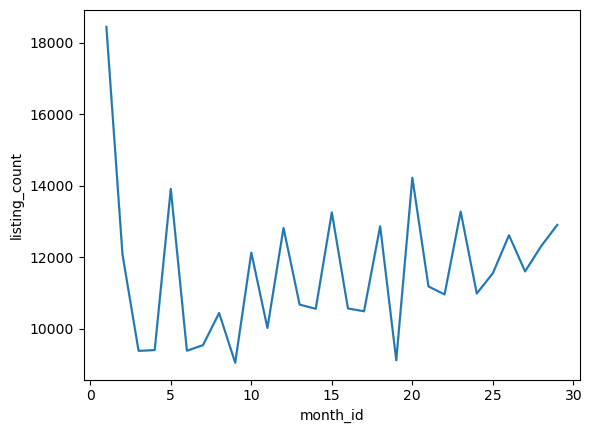

In [10]:
#get the total listings per month
listings_us_sdn = sns.lineplot(data=data,x='month_id',y='listing_count')
listings_us_sdn

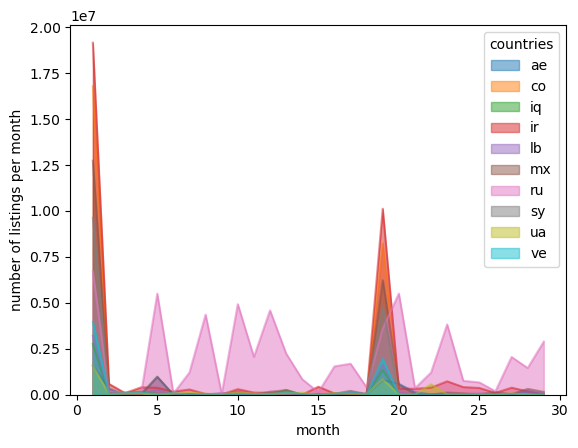

In [12]:
#time trend of the top iso codes
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
grouped2 = data.groupby(['countries', 'month_id']).agg({'listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'listing_count': 'sum'}).nlargest(10, 'listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month_id', columns='countries', values='listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of listings per month')
plt.savefig('timetrend_listings_stacked.png')

# Show the plot
plt.show()

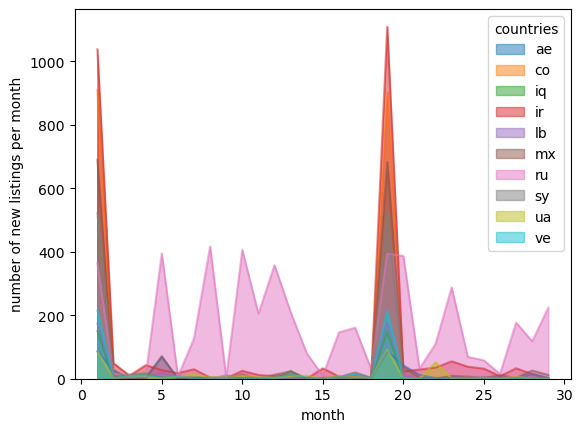

In [13]:
#time trend of the top iso codes
grouped2 = data.groupby(['countries', 'month_id']).agg({'new_listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'new_listing_count': 'sum'}).nlargest(10, 'new_listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month_id', columns='countries', values='new_listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of new listings per month')
plt.savefig('timetrend_new_listings.png')

# Show the plot
plt.show()

In [14]:
#get the sates with the most new listings
data['listing_date'].value_counts().nlargest(10)

listing_date
20210820    11222
20210930     7858
20210918     1776
20220324     1744
20220930     1356
20221001     1331
20210922     1230
20210928     1219
20230519      594
20210927      426
Name: count, dtype: int64

In [15]:
#get the top shema
data['schema'].value_counts().nlargest(5)

schema
Person          25535
Organization     7721
Company          3809
Airplane         3238
Vessel            901
Name: count, dtype: int64

In [16]:
#get the top sanctions regime
data['sanctions'].value_counts().nlargest(10)

sanctions
Block - Program - SDN List - Executive Order 14024                        2257
Block - SDN List - Program - Executive Order 14024                        1958
Program - SDN List - Block - Executive Order 14024                        1931
SDN List - Executive Order 14024 (Russia)                                 1506
SDN List - Executive Order 14024                                           883
SDN List - Program - Block - Executive Order 14024                         874
SDN List - Block - Program - Executive Order 14024                         680
Block - Program - SDN List - Executive Order 13599 (Iran) - 2018-11-05     636
SDN List - Block - Program - Executive Order 13599 (Iran) - 2018-11-05     538
SDN List - Block - Program - Unknown - 2003-05-29                          500
Name: count, dtype: int64

filter russia

In [17]:
data.countries.unique()

array(['sy', 'pk', 'ir', 'ru', 'co', 'ae', 'mx', 'be', 'iq', 'gr', nan,
       've', 'li', 'cf', 'cy', 'ao', 'gb', 'vc', 'gm', 'lb', 'ch', 'my',
       'ye', 'sa', 'eg', 'au', 'tr', 'mm', 'sg', 'cr', 'jo', 'fr', 'ca',
       'nl', 'bg', 'it', 'at', 'uz', 'sd', 'bi', 'ht', 'ec', 'ly', 'ph',
       'za', 'ng', 'af', 'es', 'cd', 'bh', 'ke', 'gt', 'th', 'si', 'kg',
       'ua', 'kz', 'tg', 'tz', 'fi', 'ws', 'pe', 'lv', 'bs', 'ss', 'se',
       'so', 'qa', 'lu', 'mk', 'ml', 'xk', 'am', 'mv', 'dm', 'ug', 'cu',
       'cm', 'mr', 'kn', 'ba', 'hu', 'jm', 'uy', 'mz', 'pl', 'pw', 'gi',
       'sm', 'gw', 'sc', 'sl', 'py', 'dk', 'bd', 'no', 'ie', 'rw', 'nz',
       'bm', 'ci', 'bb', 'et', 'gh', 'bo', 'cl', 'br', 'er', 'mo', 'ck',
       'st', 'tv'], dtype=object)

In [18]:
data_russ = data.copy()
data_russ = data_russ.filter(data_russ['countries'] == 'ru')
data_russ

""
0
1
2
3
4
...
41199
41200
41201
41202


add trigger events

In [29]:
conflict.describe
# get a month id
conflict['month'] = pd.to_datetime(conflict['conflict_event']).dt.to_period('M')
conflict_os['month'] = pd.to_datetime(conflict_os['conflict_event']).dt.to_period('M')

In [34]:
print(conflict.columns)
print(conflict_os.columns)
print(protest.columns)

Index(['Unnamed: 0', 'id', 'relid', 'year', 'type_of_violence', 'country',
       'country_id', 'fatality_best_estimate', 'gwnoa', 'gwnob',
       'conflict_event', 'iso', 'month'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'relid', 'year', 'type_of_violence', 'country',
       'country_id', 'fatality_best_estimate', 'gwnoa', 'gwnob',
       'conflict_event', 'iso', 'month'],
      dtype='object')
Index(['Unnamed: 0', 'event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'country', 'fatalities',
       'protest_event_date', 'month', 'event_count'],
      dtype='object')


,listing_date,new_listing_count
0,20210820,11222
1,20210825,7
2,20210904,4
3,20210917,10
4,20210918,1776
...,...,...
453,20231221,20
454,20231222,6
455,20231227,1
456,20231228,4


,conflict_event,fatality_best_estimate
0,2020-01-01 00:00:00.000,59.0
1,2020-01-02 00:00:00.000,14.0
2,2020-01-03 00:00:00.000,11.0
3,2020-01-04 00:00:00.000,12.0
4,2020-01-05 00:00:00.000,18.0
...,...,...
960,2022-12-27 00:00:00.000,3.0
961,2022-12-28 00:00:00.000,20.0
962,2022-12-29 00:00:00.000,18.0
963,2022-12-30 00:00:00.000,4.0


,conflict_event,fatality_best_estimate
0,2020-01-01 00:00:00.000,3.0
1,2020-01-03 00:00:00.000,4.0
2,2020-01-05 00:00:00.000,1.0
3,2020-01-12 00:00:00.000,1.0
4,2020-01-13 00:00:00.000,2.0
...,...,...
801,2022-12-27 00:00:00.000,3.0
802,2022-12-28 00:00:00.000,20.0
803,2022-12-29 00:00:00.000,1.0
804,2022-12-30 00:00:00.000,1.0


,protest_event_date,event_count
0,2020-01-01,4923
1,2020-01-02,3829
2,2020-01-03,7658
3,2020-01-04,5470
4,2020-01-05,4923
...,...,...
1457,2023-12-28,852
1458,2023-12-29,2272
1459,2023-12-30,3692
1460,2023-12-31,1704


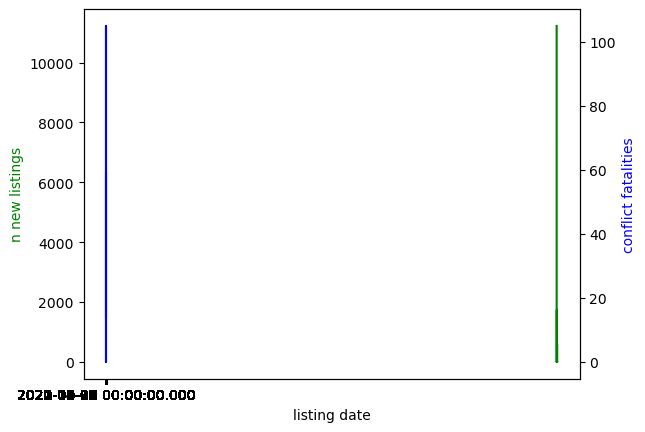

In [44]:
#get the new listings per month toether with conflict fatalities and protest events
# combined plot
grouped_1 = data.groupby(['listing_date']).agg({'new_listing_count': 'sum'})
grouped_2 = conflict.groupby(['conflict_event']).agg({'fatality_best_estimate': 'sum'})
grouped_3 = conflict_os.groupby(['conflict_event']).agg({'fatality_best_estimate': 'sum'})
grouped_4 = protest.groupby(['protest_event_date']).agg({'event_count': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
grouped_3 = grouped_3.reset_index()
grouped_4 = grouped_4.reset_index()
display(grouped_1)
display(grouped_2)
display(grouped_3)
display(grouped_4)
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(grouped_1.listing_date,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing date", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_2.conflict_event, grouped_2["fatality_best_estimate"],color="blue")
ax2.set_ylabel("conflict fatalities",color="blue",fontsize=10)
plt.savefig('timetrend_combined_listing_month.png')


In [45]:

# twin object for two different y-axis on the sample plot
ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax3.plot(grouped_3.conflict_event, grouped_3["fatality_best_estimate"],color="red")
ax3.set_ylabel("conflict fatalities one sided violence",color="red",fontsize=10)
plt.savefig('timetrend_conflict_os.png')

<Figure size 640x480 with 0 Axes>

In [47]:
# twin object for two different y-axis on the sample plot
ax4=ax.twinx()
# make a plot with different y-axis using second axis object
ax4.plot(grouped_4.protest_event_date, grouped_4["event_count"],color="orange")
ax4.set_ylabel("n protest events",color="orange",fontsize=10)
plt.savefig('timetrend_protest.png')

<Figure size 640x480 with 0 Axes>

In [38]:
import scipy
from scipy import stats
import statsmodels

In [41]:
sanction = data['listing_month']
conflicts =conflict['fatality_best_estimate']
# homogeneity
stats.levene(sanction, conflicts)
# Shapiro-Wilk test for normality
stats.shapiro(sanction)
stats.shapiro(conflicts)

C:\Users\cecilianatalie.strom\bin\conda\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [42]:
stats.ttest_ind(sanction,conflicts)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [40]:
?stats.ttest_ind

Signature:
stats.ttest_ind(
    a,
    b,
    axis=0,
    equal_var=True,
    nan_policy='propagate',
    permutations=None,
    random_state=None,
    alternative='two-sided',
    trim=0,
    *,
    keepdims=False,
)
Docstring:
Calculate the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default.

Parameters
----------
a, b : array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
equal_var : bool, optional
    If True (default), pe

# US CONS List #

In [ ]:
data = cons.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)

In [ ]:
#get the listings per month
listings_us_cons = sns.lineplot(data=cons,x='month_id',y='new_listing_count')
listings_us_cons

**BIS denied Persons lists**

In [ ]:
data = bis.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)

In [ ]:
#get the listings per month
bis = bis.groupby(['month','listing_count']).sum().reset_index()
listings_us_bis = sns.lineplot(data=bis,x='month',y='new_listing_count')
listings_us_bis

In [ ]:
# filter for russia

In [ ]:
us.iso.unique()

In [ ]:
df_russia = us[us['iso']=='RUS']
df_russia